In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [4]:
df = pd.read_csv(r'D:\SYNCNER TRAINING\BOOTCAMP\Day 5\Task 2\Cricket_highlights.csv')
print(df.head())


def extract_details(commentary):
    bowler = batter = ball_type = shot_type = speed = runs = None
    
    match = re.search(r"(\w+) to (\w+)", commentary)
    if match:
        bowler, batter = match.groups()
    
    ball_types = ["yorker", "bouncer", "full toss", "good length", "short ball"]
    for bt in ball_types:
        if bt in commentary.lower():
            ball_type = bt
            break
    
    shot_types = {"six": "Six", "four": "Four", "single": "Single", "double": "Double", "defends": "Defense"}
    for key, value in shot_types.items():
        if key in commentary.lower():
            shot_type = value
            break
    
    
    speed_match = re.search(r"(\d{3})\s?(kmph|mph)", commentary)
    if speed_match:
        speed = speed_match.group()
    
    # Extract runs scored
    runs_match = re.search(r"(\d) run", commentary)
    if runs_match:
        runs = runs_match.group(1)
    elif "six" in commentary.lower():
        runs = "6"
    elif "four" in commentary.lower():
        runs = "4"
    
    return pd.Series([bowler, batter, ball_type, shot_type, speed, runs])

   Match_id          Team  Over_num  \
0   4281444  RCB 1st Inns       0.5   
1   4281444  RCB 1st Inns       1.0   
2   4281444  RCB 1st Inns      10.0   
3   4281444  RCB 1st Inns      10.4   
4   4281444  RCB 1st Inns      10.5   

                                          Commentary  \
0  Nehra to Mandeep, FOUR, first boundary for Man...   
1  Nehra to Mandeep, FOUR, back-to-back boundarie...   
2  Henriques to Kedar Jadhav, FOUR, hit straight ...   
3  Nehra to Kedar Jadhav, FOUR, another full toss...   
4  Nehra to Kedar Jadhav, FOUR, four more. Jadhav...   

                     batsman score  
0           Nehra to Mandeep  FOUR  
1           Nehra to Mandeep  FOUR  
2  Henriques to Kedar Jadhav  FOUR  
3      Nehra to Kedar Jadhav  FOUR  
4      Nehra to Kedar Jadhav  FOUR  


In [5]:
df[["Bowler", "Batter", "Ball Type", "Shot Type", "Speed", "Runs Scored"]] = df["Commentary"].apply(extract_details)

   Match_id          Team  Over_num  \
0   4281444  RCB 1st Inns       0.5   
1   4281444  RCB 1st Inns       1.0   
2   4281444  RCB 1st Inns      10.0   
3   4281444  RCB 1st Inns      10.4   
4   4281444  RCB 1st Inns      10.5   

                                          Commentary  \
0  Nehra to Mandeep, FOUR, first boundary for Man...   
1  Nehra to Mandeep, FOUR, back-to-back boundarie...   
2  Henriques to Kedar Jadhav, FOUR, hit straight ...   
3  Nehra to Kedar Jadhav, FOUR, another full toss...   
4  Nehra to Kedar Jadhav, FOUR, four more. Jadhav...   

                     batsman score     Bowler   Batter Ball Type Shot Type  \
0           Nehra to Mandeep  FOUR      Nehra  Mandeep      None      Four   
1           Nehra to Mandeep  FOUR      Nehra  Mandeep      None      Four   
2  Henriques to Kedar Jadhav  FOUR  Henriques    Kedar      None      Four   
3      Nehra to Kedar Jadhav  FOUR      Nehra    Kedar    yorker      Four   
4      Nehra to Kedar Jadhav  FOUR    

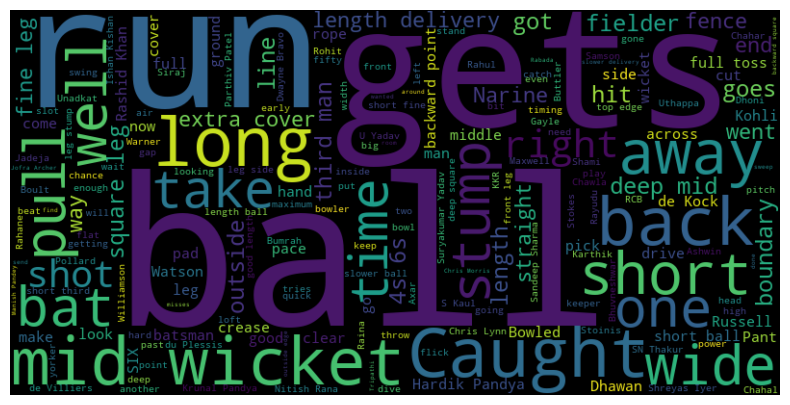

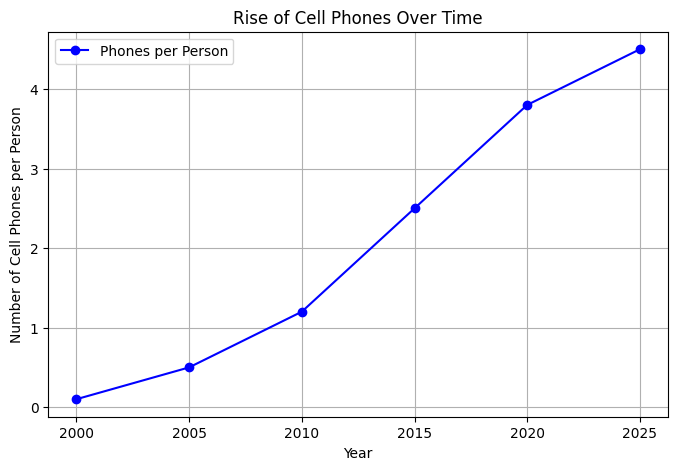

In [6]:
print(df.head())
commentary_text = " ".join(df["Commentary"].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(commentary_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()
years = [2000, 2005, 2010, 2015, 2020, 2025]
phones_per_person = [0.1, 0.5, 1.2, 2.5, 3.8, 4.5]
plt.figure(figsize=(8, 5))
plt.plot(years, phones_per_person, marker='o', linestyle='-', color='b', label='Phones per Person')
plt.xlabel("Year")
plt.ylabel("Number of Cell Phones per Person")
plt.title("Rise of Cell Phones Over Time")
plt.legend()
plt.grid()
plt.show()